In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from itertools import chain

In [661]:
#reading files
ds1=pd.read_csv("Data_1a.csv")
ds1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [662]:
#Identifying Null Values 
a=round(100*(ds1.isnull().sum(axis=0)/len(ds1.index)),2)
print(a)

Items  Description             0.00
Duration                       0.00
Andhra Pradesh                 0.00
Arunachal Pradesh             18.18
Assam                         18.18
Bihar                         18.18
Chhattisgarh                   0.00
Goa                           18.18
Gujarat                       18.18
Haryana                        0.00
Himachal Pradesh              36.36
Jammu & Kashmir               18.18
Jharkhand                     18.18
Karnataka                     18.18
Kerala                        18.18
Madhya Pradesh                 0.00
Maharashtra                   36.36
Manipur                       36.36
Meghalaya                      0.00
Mizoram                       36.36
Nagaland                      36.36
Odisha                         0.00
Punjab                        36.36
Rajasthan                     36.36
Sikkim                        18.18
Tamil Nadu                     0.00
Telangana                      0.00
Tripura                     

In [663]:
#Drop columns where all the data is missing
ds1=ds1.dropna(axis=1,how="all")
ds1=ds1.dropna(axis=0,how="all")
#print(ds1.isnull().sum(axis=0))
b=round(100*(ds1.isnull().sum(axis=0)/len(ds1.index)),2)
print(b)
#round the values in decimal places
ds1=ds1.round()

Items  Description            0.00
Duration                      0.00
Andhra Pradesh                0.00
Arunachal Pradesh            18.18
Assam                        18.18
Bihar                        18.18
Chhattisgarh                  0.00
Goa                          18.18
Gujarat                      18.18
Haryana                       0.00
Himachal Pradesh             36.36
Jammu & Kashmir              18.18
Jharkhand                    18.18
Karnataka                    18.18
Kerala                       18.18
Madhya Pradesh                0.00
Maharashtra                  36.36
Manipur                      36.36
Meghalaya                     0.00
Mizoram                      36.36
Nagaland                     36.36
Odisha                        0.00
Punjab                       36.36
Rajasthan                    36.36
Sikkim                       18.18
Tamil Nadu                    0.00
Telangana                     0.00
Tripura                      36.36
Uttar Pradesh       

In [664]:
#Transpose data for better readability
ds2=ds1.transpose()
ds2.to_csv('data1a_T.csv')
ds5=pd.read_csv('data1a_T.csv')
new_header = ds2.iloc[0] #grab the first row for the header
ds2= ds2[1:] 
ds2.columns = new_header #set the header row as the df 
ds2 = pd.read_csv('data1a_T.csv', header=[0,1])
ds2.columns = ds2.columns.map('_'.join)
ds2

,Unnamed: 0_level_0_Items Description,0_GSDP - CURRENT PRICES (` in Crore),1_GSDP - CURRENT PRICES (` in Crore),2_GSDP - CURRENT PRICES (` in Crore),3_GSDP - CURRENT PRICES (` in Crore),4_GSDP - CURRENT PRICES (` in Crore),5_GSDP - CURRENT PRICES (` in Crore),6_(% Growth over previous year),7_(% Growth over previous year),8_(% Growth over previous year),9_(% Growth over previous year),10_(% Growth over previous year)
0,Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13,2013-14,2014-15,2015-16,2016-17
1,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,699307.0,8.0,13.0,13.0,16.0,15.0
2,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,NaN,13.0,16.0,15.0,12.0,NaN
3,Assam,143175.0,156864.0,177745.0,198098.0,224234.0,NaN,10.0,13.0,11.0,13.0,NaN
4,Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,NaN,14.0,12.0,18.0,11.0,NaN
5,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,290140.0,12.0,16.0,14.0,11.0,11.0
6,Goa,42367.0,38120.0,35921.0,40633.0,45002.0,NaN,-10.0,-6.0,13.0,11.0,NaN
7,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,NaN,18.0,11.0,11.0,11.0,NaN
8,Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,547396.0,17.0,15.0,9.0,11.0,13.0
9,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,NaN,14.0,14.0,10.0,NaN,NaN


In [665]:
#rename the columns to increase the readability of the code
ds2.rename(columns={'0_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Prices (2011-2012)'}, inplace=True)
ds2.rename(columns={'1_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Prices (2012-2013)'}, inplace=True)
ds2.rename(columns={'2_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Prices (2013-2014)'}, inplace=True)
ds2.rename(columns={'3_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Price (2014-2015)'}, inplace=True)
ds2.rename(columns={'4_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Prices (2015-2016)'}, inplace=True)
ds2.rename(columns={'5_GSDP - CURRENT PRICES (` in Crore)':'GSDP Current Prices (2016-2017)'}, inplace=True)
ds2.rename(columns={'6_(% Growth over previous year)':'% Growth over previous year (2012-2013)'}, inplace=True)
ds2.rename(columns={'7_(% Growth over previous year)':'% Growth over previous year(2013-2014)'}, inplace=True)
ds2.rename(columns={'8_(% Growth over previous year)':'% Growth over previous year (2014-2015)'}, inplace=True)
ds2.rename(columns={'9_(% Growth over previous year)':'% Growth over previous year (2015-2016)'}, inplace=True)
ds2.rename(columns={'10_(% Growth over previous year)':'% Growth over previous year(2016-2017)'}, inplace=True)
ds2.columns.values[0]="States"
ds2

,States,GSDP Current Prices (2011-2012),GSDP Current Prices (2012-2013),GSDP Current Prices (2013-2014),GSDP Current Price (2014-2015),GSDP Current Prices (2015-2016),GSDP Current Prices (2016-2017),% Growth over previous year (2012-2013),% Growth over previous year(2013-2014),% Growth over previous year (2014-2015),% Growth over previous year (2015-2016),% Growth over previous year(2016-2017)
0,Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13,2013-14,2014-15,2015-16,2016-17
1,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,699307.0,8.0,13.0,13.0,16.0,15.0
2,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,NaN,13.0,16.0,15.0,12.0,NaN
3,Assam,143175.0,156864.0,177745.0,198098.0,224234.0,NaN,10.0,13.0,11.0,13.0,NaN
4,Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,NaN,14.0,12.0,18.0,11.0,NaN
5,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,290140.0,12.0,16.0,14.0,11.0,11.0
6,Goa,42367.0,38120.0,35921.0,40633.0,45002.0,NaN,-10.0,-6.0,13.0,11.0,NaN
7,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,NaN,18.0,11.0,11.0,11.0,NaN
8,Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,547396.0,17.0,15.0,9.0,11.0,13.0
9,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,NaN,14.0,14.0,10.0,NaN,NaN


In [666]:
#drop excess columns
ds2=ds2.drop([0])
ds2=ds2.drop("GSDP Current Prices (2016-2017)",axis=1)
ds2=ds2.drop("% Growth over previous year(2016-2017)",axis=1)

In [667]:
#dropping union territories
ds2=ds2.drop([29,30,31,32])
ds2=ds2.reset_index(drop=True)
ds2

,States,GSDP Current Prices (2011-2012),GSDP Current Prices (2012-2013),GSDP Current Prices (2013-2014),GSDP Current Price (2014-2015),GSDP Current Prices (2015-2016),% Growth over previous year (2012-2013),% Growth over previous year(2013-2014),% Growth over previous year (2014-2015),% Growth over previous year (2015-2016)
0,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.0,13.0,13.0,16.0
1,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.0,16.0,15.0,12.0
2,Assam,143175.0,156864.0,177745.0,198098.0,224234.0,10.0,13.0,11.0,13.0
3,Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.0,12.0,18.0,11.0
4,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.0,16.0,14.0,11.0
5,Goa,42367.0,38120.0,35921.0,40633.0,45002.0,-10.0,-6.0,13.0,11.0
6,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,18.0,11.0,11.0,11.0
7,Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,17.0,15.0,9.0,11.0
8,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,14.0,14.0,10.0,NaN
9,Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.0,11.0,10.0,5.0,18.0


In [668]:
#checking datatypes
before = ds2.dtypes
print(before)
ds2.round()


States                                     object
GSDP Current Prices (2011-2012)            object
GSDP Current Prices (2012-2013)            object
GSDP Current Prices (2013-2014)            object
GSDP Current Price (2014-2015)             object
GSDP Current Prices (2015-2016)            object
% Growth over previous year (2012-2013)    object
% Growth over previous year(2013-2014)     object
% Growth over previous year (2014-2015)    object
% Growth over previous year (2015-2016)    object
dtype: object


,States,GSDP Current Prices (2011-2012),GSDP Current Prices (2012-2013),GSDP Current Prices (2013-2014),GSDP Current Price (2014-2015),GSDP Current Prices (2015-2016),% Growth over previous year (2012-2013),% Growth over previous year(2013-2014),% Growth over previous year (2014-2015),% Growth over previous year (2015-2016)
0,Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,8.0,13.0,13.0,16.0
1,Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,13.0,16.0,15.0,12.0
2,Assam,143175.0,156864.0,177745.0,198098.0,224234.0,10.0,13.0,11.0,13.0
3,Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,14.0,12.0,18.0,11.0
4,Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,12.0,16.0,14.0,11.0
5,Goa,42367.0,38120.0,35921.0,40633.0,45002.0,-10.0,-6.0,13.0,11.0
6,Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,18.0,11.0,11.0,11.0
7,Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,17.0,15.0,9.0,11.0
8,Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN,14.0,14.0,10.0,NaN
9,Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.0,11.0,10.0,5.0,18.0


In [669]:
#changing datatypes
ds2["States"]=ds2["States"].astype(str)
ds2["GSDP Current Prices (2011-2012)"]=ds2["GSDP Current Prices (2011-2012)"].astype(float)
ds2["GSDP Current Prices (2012-2013)"]=ds2["GSDP Current Prices (2012-2013)"].astype(float) 
ds2["GSDP Current Prices (2013-2014)"]=ds2["GSDP Current Prices (2013-2014)"].astype(float) 
ds2["GSDP Current Price (2014-2015)"]=ds2["GSDP Current Price (2014-2015)"].astype(float) 
ds2["GSDP Current Prices (2015-2016)"]= ds2["GSDP Current Prices (2015-2016)"].astype(float) 

ds2["% Growth over previous year (2014-2015)"]= ds2["% Growth over previous year (2014-2015)"].astype(float)
ds2["% Growth over previous year (2015-2016)"]= ds2["% Growth over previous year (2015-2016)"].astype(float)
ds2["% Growth over previous year (2012-2013)"]= ds2["% Growth over previous year (2012-2013)"].astype(float) 
ds2["% Growth over previous year(2013-2014)"]= ds2["% Growth over previous year(2013-2014)"].astype(float)
after=ds2.dtypes
after

States                                      object
GSDP Current Prices (2011-2012)            float64
GSDP Current Prices (2012-2013)            float64
GSDP Current Prices (2013-2014)            float64
GSDP Current Price (2014-2015)             float64
GSDP Current Prices (2015-2016)            float64
% Growth over previous year (2012-2013)    float64
% Growth over previous year(2013-2014)     float64
% Growth over previous year (2014-2015)    float64
% Growth over previous year (2015-2016)    float64
dtype: object

In [670]:
#slicing the data and selecting the data to form scatter plot
a=ds2.iloc[:, [6,7,8,9]]
a=pd.DataFrame(a)
a

,% Growth over previous year (2012-2013),% Growth over previous year(2013-2014),% Growth over previous year (2014-2015),% Growth over previous year (2015-2016)
0,8.0,13.0,13.0,16.0
1,13.0,16.0,15.0,12.0
2,10.0,13.0,11.0,13.0
3,14.0,12.0,18.0,11.0
4,12.0,16.0,14.0,11.0
5,-10.0,-6.0,13.0,11.0
6,18.0,11.0,11.0,11.0
7,17.0,15.0,9.0,11.0
8,14.0,14.0,10.0,NaN
9,11.0,10.0,5.0,18.0


In [671]:
a=a.T
a["number"]=[1,2,3,4]
a

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,number
% Growth over previous year (2012-2013),8.0,13.0,10.0,14.0,12.0,-10.0,18.0,17.0,14.0,11.0,...,12.0,13.0,11.0,14.0,12.0,13.0,14.0,14.0,14.0,1
% Growth over previous year(2013-2014),13.0,16.0,13.0,12.0,16.0,-6.0,11.0,15.0,14.0,10.0,...,12.0,11.0,12.0,14.0,13.0,18.0,15.0,14.0,13.0,2
% Growth over previous year (2014-2015),13.0,15.0,11.0,18.0,14.0,13.0,11.0,9.0,10.0,5.0,...,10.0,11.0,10.0,13.0,13.0,16.0,11.0,8.0,11.0,3
% Growth over previous year (2015-2016),16.0,12.0,13.0,11.0,11.0,11.0,11.0,11.0,NaN,18.0,...,NaN,NaN,9.0,11.0,13.0,NaN,11.0,14.0,10.0,4


C:\Users\Cognitive\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


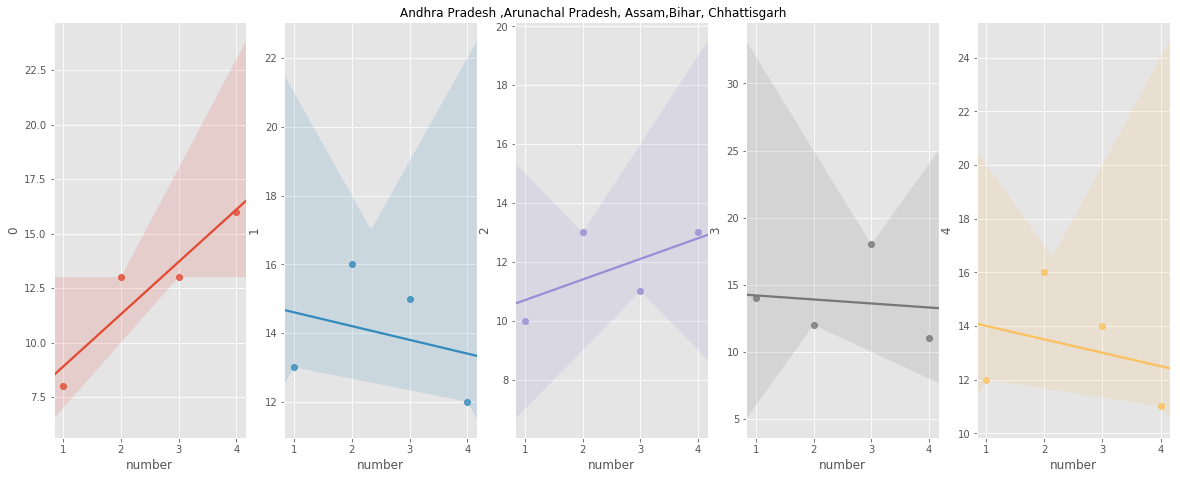

<Figure size 432x288 with 0 Axes>

In [672]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 5, figsize=(20,7))

for i,col in enumerate(a.columns[0:5]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Andhra Pradesh ,Arunachal Pradesh, Assam,Bihar, Chhattisgarh')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close()

plt.savefig('Scatter_Plot_1.png')


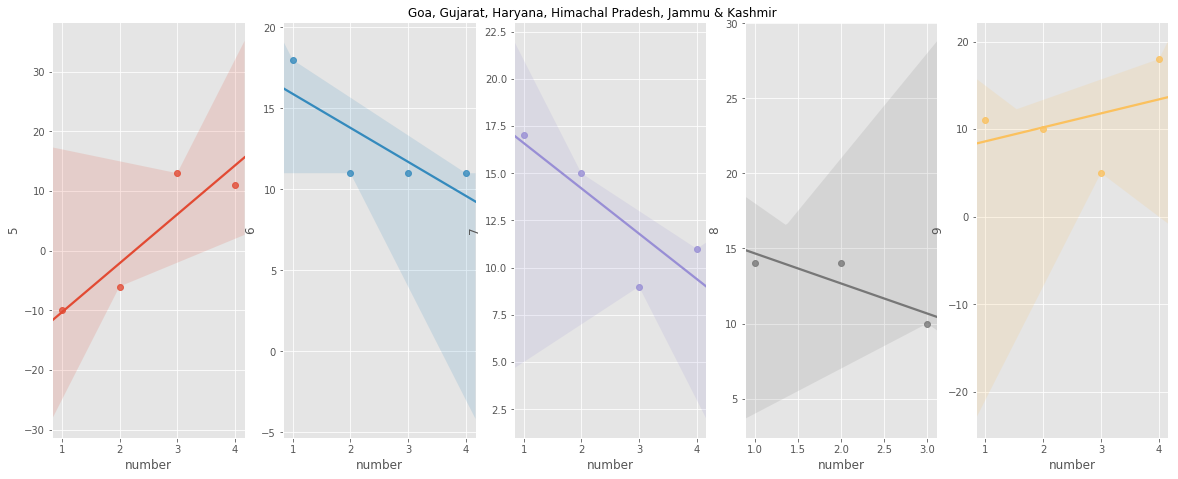

<Figure size 432x288 with 0 Axes>

In [673]:
fig, ax = plt.subplots(1, 5, figsize=(20,7))

for i,col in enumerate(a.columns[5:10]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Goa, Gujarat, Haryana, Himachal Pradesh, Jammu & Kashmir')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close() 

plt.savefig('Scatter_Plot_2.png')

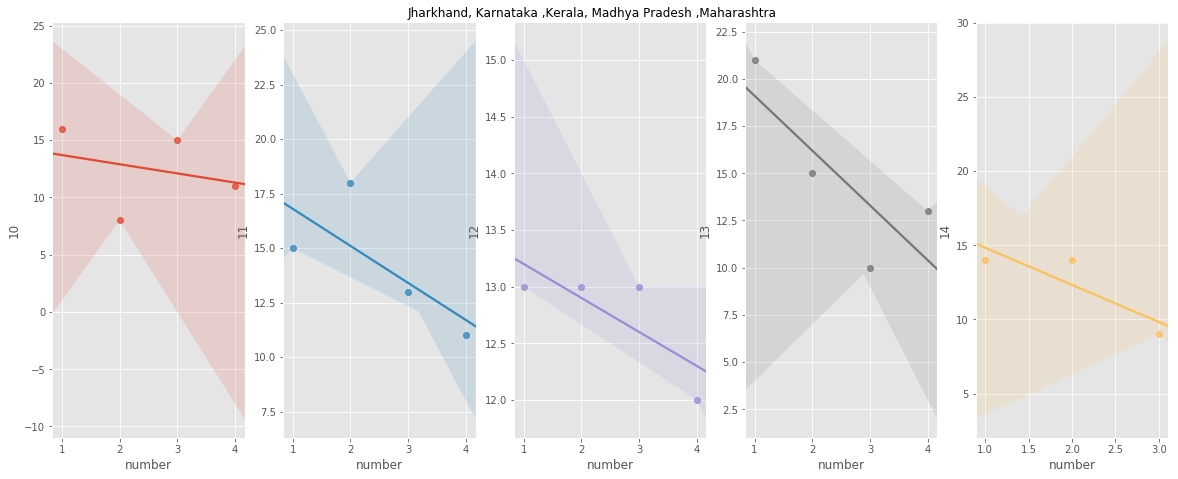

<Figure size 432x288 with 0 Axes>

In [674]:
fig, ax = plt.subplots(1, 5, figsize=(20,7))

for i,col in enumerate(a.columns[10:15]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Jharkhand, Karnataka ,Kerala, Madhya Pradesh ,Maharashtra')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close()  
plt.savefig('Scatter_Plot_3.png')

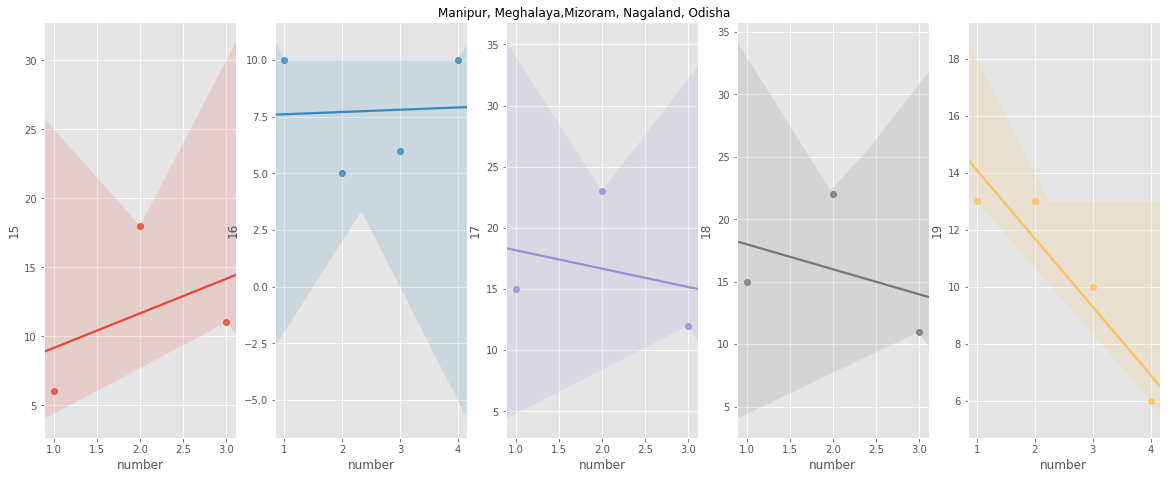

<Figure size 432x288 with 0 Axes>

In [675]:
fig, ax = plt.subplots(1, 5, figsize=(20,7))

for i,col in enumerate(a.columns[15:20]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Manipur, Meghalaya,Mizoram, Nagaland, Odisha')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close() 

   
plt.savefig('Scatter_Plot_3.png')

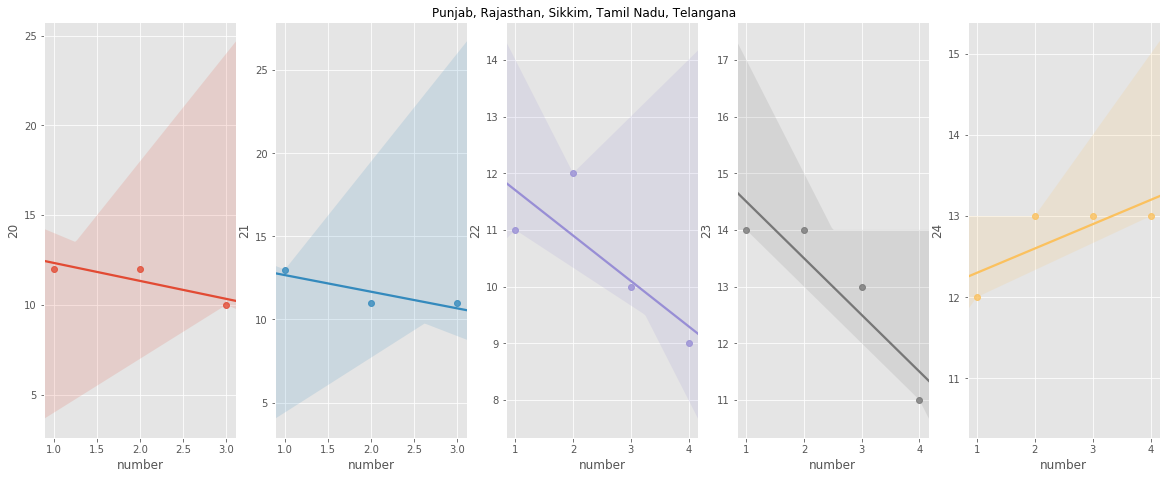

<Figure size 432x288 with 0 Axes>

In [676]:
fig, ax = plt.subplots(1, 5, figsize=(20,7))

for i,col in enumerate(a.columns[20:25]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Punjab, Rajasthan, Sikkim, Tamil Nadu, Telangana')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close() 
plt.savefig('Scatter_Plot_4.png')

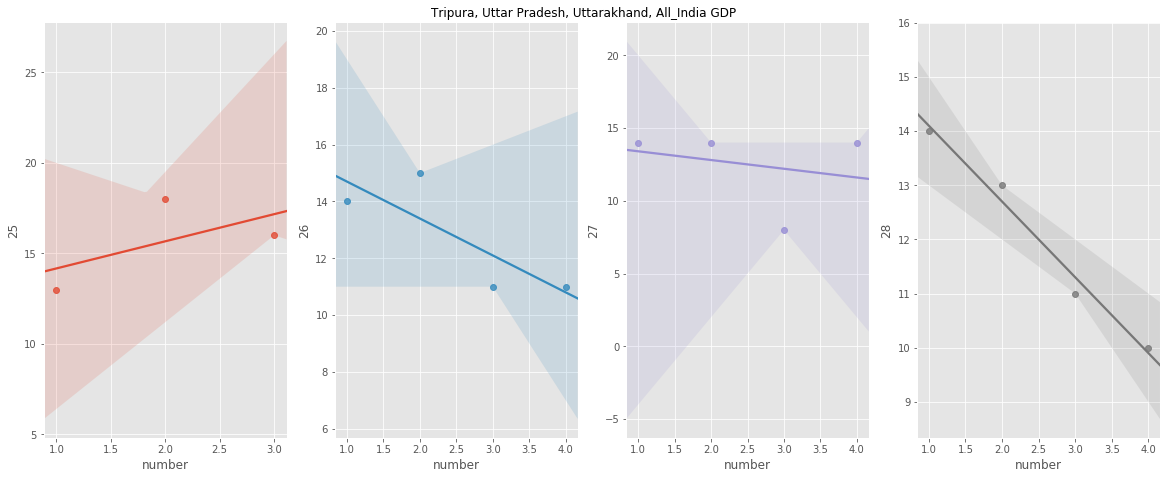

<Figure size 432x288 with 0 Axes>

In [677]:
fig, ax = plt.subplots(1, 4, figsize=(20,7))

for i,col in enumerate(a.columns[25:29]):
     sns.regplot(x=a["number"], y=a[col], ax=ax[i])
fig.suptitle('Tripura, Uttar Pradesh, Uttarakhand, All_India GDP')
fig.subplots_adjust(top=0.95)
plt.show()
plt.clf()
plt.close() 
plt.savefig('Scatter_Plot_5.png')

In [678]:
pgrowth=ds2.iloc[:, [6,7,8,9]].mean(axis=1)
mean1= pd.DataFrame(pgrowth)
ds6=ds2
ds6=pd.merge(ds6,mean1, left_index=True, right_index=True)
ds7=pd.DataFrame(ds6)
ds6.columns.values[10]="%Mean Growth"


ds6

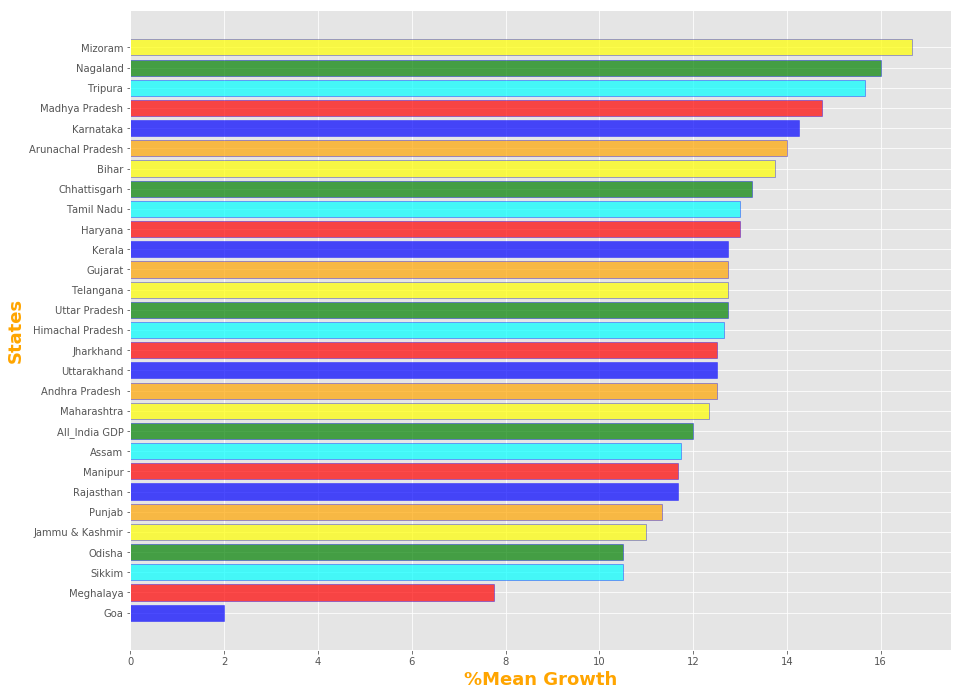

<Figure size 432x288 with 0 Axes>

In [680]:
# Draw a nested barplot to compare states
ds6.sort_values("%Mean Growth", axis = 0, ascending = True,inplace = True)
%matplotlib inline
x="States"
y="%Mean Growth"
fig=plt.figure(figsize=(50,40))
ax1=plt.subplot(3,3,3)

ax1.barh(x,y,data=ds6,color=['Blue','red','cyan','Green','yellow','Orange'],edgecolor='blue',alpha=0.7)
plt.ylabel('States', fontweight='bold', color = 'Orange', fontsize='18')
plt.xlabel('%Mean Growth', fontweight='bold', color = 'Orange', fontsize='18')
plt.show()
plt.savefig('growingconsistentlyfast.png')

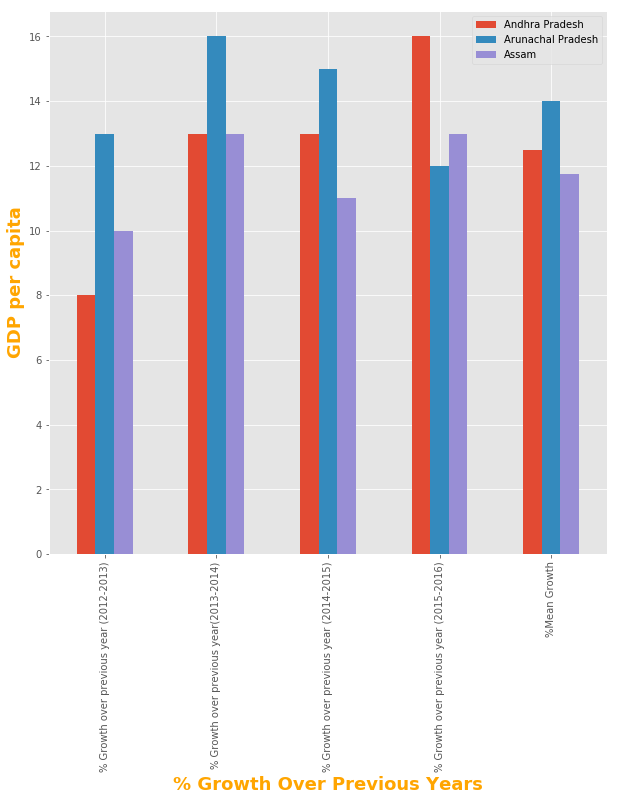

In [681]:
#compare the growth rates of any two states
m=ds7.iloc[[0,1,2], [6,7,8,9,10]]
plt.style.use('ggplot')
m.T.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=90)
plt.legend(["Andhra Pradesh","Arunachal Pradesh","Assam"], loc='upper right')
plt.xlabel('% Growth Over Previous Years', fontweight='bold', color = 'Orange', fontsize='18')
plt.ylabel('GDP per capita',fontweight='bold', color = 'Orange', fontsize='18')
plt.savefig('State_Comparision.png')

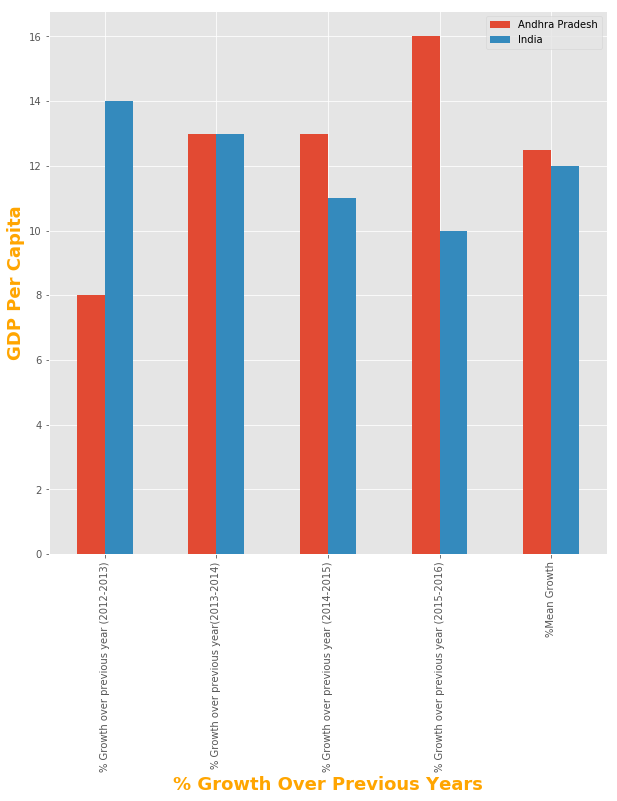

In [682]:
p=ds7.iloc[[0,28], [6,7,8,9,10]]
plt.style.use('ggplot')
p.T.plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=90)
plt.legend(["Andhra Pradesh", "India"], loc='upper right')
plt.ylabel('GDP Per Capita',fontweight='bold', color = 'Orange', fontsize='18')
plt.xlabel('% Growth Over Previous Years', fontweight='bold', color = 'Orange', fontsize='18')
plt.savefig('Homestate.png')

In [683]:
ds3=ds2.iloc[0:,[0,5]]
#ds3=ds3.drop(28)
ds3=ds3.dropna(axis=0,how="any")
ds3.sort_values("GSDP Current Prices (2015-2016)", axis = 0, ascending = True,inplace = True)
ds3

,States,GSDP Current Prices (2015-2016)
22,Sikkim,16637.0
1,Arunachal Pradesh,18784.0
16,Meghalaya,26745.0
5,Goa,45002.0
9,Jammu & Kashmir,118387.0
27,Uttarakhand,184091.0
2,Assam,224234.0
10,Jharkhand,241955.0
4,Chhattisgarh,260776.0
19,Odisha,341887.0


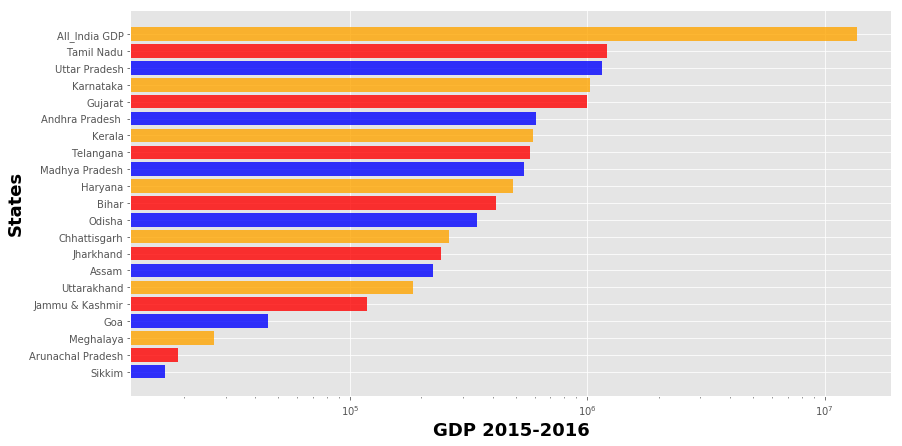

<Figure size 432x288 with 0 Axes>

In [684]:
# total GDP of the states for the year 2015-16
%matplotlib inline
x="States"
y="GSDP Current Prices (2015-2016)"
fig=plt.figure(figsize=(30,20))
ax1=plt.subplot(2,2,2)
ax1.barh(x,y,data=ds3,color=['Blue','Red','Orange'],alpha=0.8)
plt.xscale('log')
plt.ylabel('States', fontweight='bold', color = 'Black', fontsize='18')
plt.xlabel('GDP 2015-2016', fontweight='bold', color = 'Black', fontsize='18')
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()
plt.savefig('GDP1516.png')